In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_(nu=0.5.csv")

In [5]:
# Group by 'Type' and calculate mean and std for each group
unit_column = np.array([np.ones(35)*100, np.ones(35)*150, np.ones(35)*200, np.ones(35)*250]).flatten()
df.insert(loc=2, column='UNITS', value=unit_column)


In [6]:
std_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).std()['MSE']).reset_index().set_index(['UNITS', 'TYPE']).unstack()
mean_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).mean()['MSE']).reset_index().set_index(['UNITS', 'TYPE']).unstack()

In [7]:
std_df

MSE                                                          \
TYPE              0             1             2             3             4   
UNITS                                                                         
100.0  1.681007e-06  2.383289e-08  2.299094e-07  2.703541e-08  2.454960e-06   
150.0  2.543848e-06  1.003782e-08  3.042614e-10  4.769090e-08  5.104800e-10   
200.0  1.389516e-06  2.146273e-08  1.506955e-10  2.947190e-07  3.362114e-10   
250.0  8.766432e-07  3.644959e-07  6.637595e-11  3.180166e-07  1.928949e-10   

                                   
TYPE              5             6  
UNITS                              
100.0  2.978648e-07  7.561586e-08  
150.0  3.295983e-10  1.778614e-08  
200.0  2.275211e-10  1.552168e-10  
250.0  1.733985e-10  4.288274e-11

In [8]:
mean_df

MSE                                                          \
TYPE          0             1             2             3             4   
UNITS                                                                     
100.0  0.000005  9.140333e-08  1.047950e-07  1.022523e-07  1.229541e-06   
150.0  0.000005  6.983918e-08  8.519860e-10  1.245732e-07  1.260107e-09   
200.0  0.000004  7.538878e-08  5.027163e-10  2.793699e-07  8.520815e-10   
250.0  0.000002  3.429150e-07  2.706576e-10  1.481267e-07  4.299275e-10   

                                   
TYPE              5             6  
UNITS                              
100.0  1.369210e-07  3.616144e-08  
150.0  1.198879e-09  9.216387e-09  
200.0  3.972886e-10  3.420999e-10  
250.0  3.006265e-10  1.659436e-10

In [9]:
std_df = std_df.mean()

In [10]:
std_df[3]

1.7186547017769517e-07

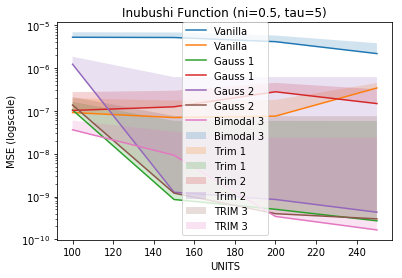

In [13]:
logscale = True


for c in mean_df.columns:
    x = mean_df.index.values
    y_mean = mean_df[c]
    plt.plot(x, y_mean)
    plt.fill_between(x, y_mean, y_mean + std_df[c], alpha=0.2, linewidth=4, linestyle='dashdot', antialiased=True)
    #plt.errorbar(x, y_mean, std_df[i])

    # Set labels and title
    plt.xlabel('UNITS')
    plt.ylabel(f'MSE {"(logscale)" if logscale else ""}')
    plt.title('Inubushi Function ((nu=0.5, tau=1)')

# Customize legend labels
legend_labels = [
    'Vanilla',
    'Vanilla',
    'Gauss 1',
    'Gauss 1',
    'Gauss 2',
    'Gauss 2',
    'Bimodal 3',
    'Bimodal 3',
    'Trim 1',
    'Trim 1',
    'Trim 2',
    'Trim 2',
    'TRIM 3', 
    'TRIM 3'
]

plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)])
    
plt.yscale("log")
#plt.ylim([10**(-4), 10**(-15)])      
# Show the plot
plt.show()

In [44]:
def results_timeseries_plotter(attribute = "MSE", filepath = "../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_(nu=0.5.csv", title = "Inubushi Function (ni = 0.5)", logscale = True, plot_stds = True):
    
    df = pd.read_csv(filepath)
    unit_column = np.array([np.ones(35)*100, np.ones(35)*150, np.ones(35)*200, np.ones(35)*250]).flatten()
    df.insert(loc=2, column='UNITS', value=unit_column)
    mean_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).mean()[attribute]).reset_index().set_index(['UNITS', 'TYPE']).unstack()

    # Plot the data
    #ax = df_unstacked.plot(kind='line', marker='o', logy=logscale)

    if plot_stds: 
        std_df = pd.DataFrame(df.groupby(["UNITS", "TYPE"]).std()[attribute]).reset_index().set_index(['UNITS', 'TYPE']).unstack()
        
    for c in mean_df.columns:
        x = mean_df.index.values
        y_mean = mean_df[c]
        plt.plot(x, y_mean)

        if plot_stds: 
            plt.fill_between(x, y_mean, y_mean + std_df[c], alpha=0.2, linewidth=4, linestyle='dashdot', antialiased=True)

    # Set labels and title
    plt.xlabel('UNITS')
    plt.ylabel(f'{attribute} {"(logscale)" if logscale else ""}')
    plt.title(title)

    # Customize legend labels
    legend_labels =  [
        'Vanilla',
        'Vanilla',
        'Gauss 1',
        'Gauss 1',
        'Gauss 2',
        'Gauss 2',
        'Bimodal 3',
        'Bimodal 3',
        'Trim 1',
        'Trim 1',
        'Trim 2',
        'Trim 2',
        'TRIM 3', 
        'TRIM 3'
    ] if plot_stds else ['Vanilla','Gauss 1', 'Gauss 2','Bimodal','Trim 1','Trim 2','TRIM 3']

    plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)] if plot_stds else legend_labels ) 
    #plt.legend(labels= [legend_labels[i] for i in range(mean_df.columns.shape[0]*2)])

    if logscale:
        plt.yscale("log")

    # Show the plot
    plt.show()

In [16]:
attribute = "MSE" 
filepath = "../BENCHMARKS/RESULTS/4.3_RESULTS_Inubushi_(nu=0.5.csv"
title = "Inubushi Function (ni = 0.5)"
logscale = True
plot_stds = True

## Inubushi $\nu$ = 0.5

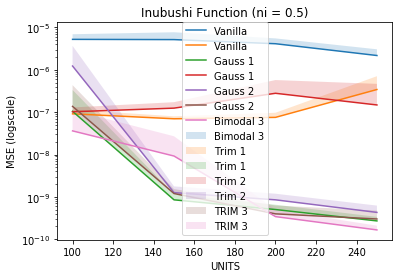

In [23]:
results_timeseries_plotter("MSE",filepath, title, plot_stds)

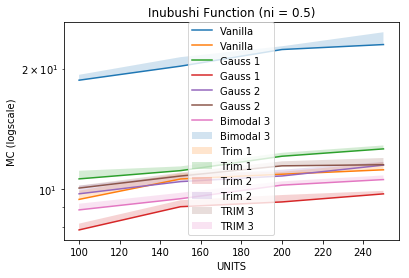

In [32]:
results_timeseries_plotter("MC",filepath, "Inubushi Function (ni = 0.5)", plot_stds)

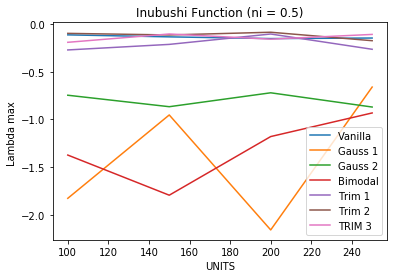

In [45]:
results_timeseries_plotter("Lambda max",filepath, "Inubushi Function (ni = 0.5)", logscale=False, plot_stds=False)

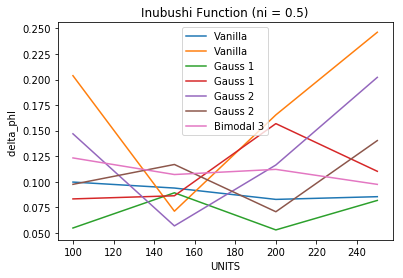

In [36]:
results_timeseries_plotter("delta_phI",filepath, "Inubushi Function (ni = 0.5)", logscale=False, plot_stds=False)

## Inubushi $\nu$ = 0.5 $\tau$ = 5 

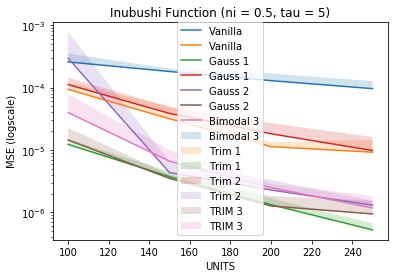

In [21]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_(nu=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", plot_stds=True)

In [ ]:
results_timeseries_plotter("MC","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_(nu=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", plot_stds=True)

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_(nu=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", logscale=False, plot_stds=False)

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.4_RESULTS_Inubushi_(nu=0.5_tau=5.csv", "Inubushi Function (ni = 0.5, tau = 5)", plogscale=False, plot_stds=False)

## Inubushi $\nu$ = -0.5 

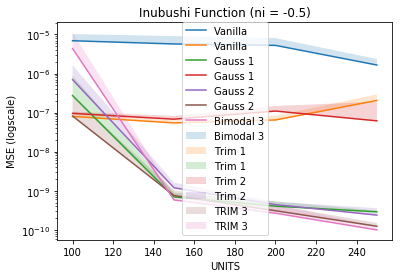

In [31]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_(nu=-0.5.csv", "Inubushi Function (ni = -0.5)")

In [ ]:
results_timeseries_plotter("MC","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_(nu=-0.5.csv", "Inubushi Function (ni = -0.5)")

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_(nu=-0.5.csv", "Inubushi Function (ni = -0.5)", logscale=False, plot_stds=False)

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.6_RESULTS_Inubushi_(nu=-0.5.csv", "Inubushi Function (ni = -0.5)", logscale=False, plot_stds=False)

## Inubushi $\nu$ = -1 

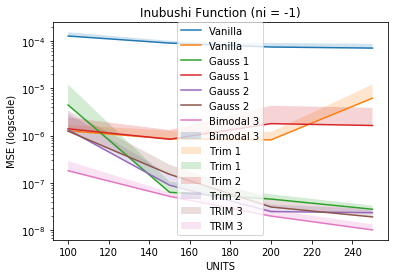

In [30]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.8_Inubushi_(nu=-10.csv", "Inubushi Function (ni = -1)")

In [ ]:
results_timeseries_plotter("MC","../BENCHMARKS/RESULTS/4.8_Inubushi_(nu=-10.csv", "Inubushi Function (ni = -1)", )

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.8_Inubushi_(nu=-10.csv", "Inubushi Function (ni = -1)", logscale=False, plot_stds=False)

In [ ]:
results_timeseries_plotter("MSE","../BENCHMARKS/RESULTS/4.8_Inubushi_(nu=-10.csv", "Inubushi Function (ni = -1)", logscale=False, plot_stds=False)